# EDA - BGG data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1. Games.csv

In [2]:
df_games = pd.read_csv('../data/games.csv')
df_games.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,21926,21926,0,1,0,0,0,0,0,0
3,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,21926,21926,0,0,0,0,0,0,0,0
4,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,21926,21926,0,1,0,0,0,0,0,0


In [3]:
df_games.describe()

,BGGId,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,16395.000000,16034.000000,...,21925.000000,21925.000000,21925.000000,21925.00000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,1985.494914,1.982131,6.424922,5.685673,1.516374,2.007343,5.707868,10.004391,216.461819,...,21295.352201,21062.680274,0.055827,0.10577,0.161003,0.105633,0.013820,0.050855,0.029190,0.040182
std,104628.721777,212.486214,0.848983,0.932477,0.365311,0.285578,0.693093,15.014643,3.269157,236.595136,...,3637.139987,4219.776597,0.229592,0.30755,0.367542,0.307374,0.116745,0.219707,0.168344,0.196391
min,1.000000,-3500.000000,0.000000,1.041330,3.574810,0.196023,0.000000,0.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,2001.000000,1.333300,5.836960,5.510300,1.320720,2.000000,4.000000,8.000000,24.027778,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,2011.000000,1.968800,6.453950,5.546540,1.476880,2.000000,4.000000,10.000000,138.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,2017.000000,2.525200,7.052450,5.679890,1.665470,2.000000,6.000000,12.000000,351.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,2021.000000,5.000000,9.914290,8.514880,4.277280,10.000000,999.000000,21.000000,1757.000000,...,21926.000000,21926.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BGGId                21925 non-null  int64  
 1   Name                 21925 non-null  object 
 2   Description          21924 non-null  object 
 3   YearPublished        21925 non-null  int64  
 4   GameWeight           21925 non-null  float64
 5   AvgRating            21925 non-null  float64
 6   BayesAvgRating       21925 non-null  float64
 7   StdDev               21925 non-null  float64
 8   MinPlayers           21925 non-null  int64  
 9   MaxPlayers           21925 non-null  int64  
 10  ComAgeRec            16395 non-null  float64
 11  LanguageEase         16034 non-null  float64
 12  BestPlayers          21925 non-null  int64  
 13  GoodPlayers          21925 non-null  object 
 14  NumOwned             21925 non-null  int64  
 15  NumWant              21925 non-null 

In [5]:
df_games.isnull().sum().sort_values(ascending=False)

Family                 15262
LanguageEase            5891
ComAgeRec               5530
ImagePath                 17
Description                1
AvgRating                  0
GameWeight                 0
BGGId                      0
StdDev                     0
BayesAvgRating             0
MaxPlayers                 0
MinPlayers                 0
BestPlayers                0
GoodPlayers                0
Name                       0
YearPublished              0
NumWant                    0
NumOwned                   0
NumWish                    0
NumWeightVotes             0
ComMaxPlaytime             0
MfgAgeRec                  0
MfgPlaytime                0
ComMinPlaytime             0
NumComments                0
NumUserRatings             0
NumAlternates              0
NumExpansions              0
IsReimplementation         0
NumImplementations         0
Kickstarted                0
Rank:boardgame             0
Rank:strategygames         0
Rank:abstracts             0
Rank:familygam

# 1.1 Histograma de columnas numericas

In [6]:
df_games.select_dtypes(include='number').columns

Index(['BGGId', 'YearPublished', 'GameWeight', 'AvgRating', 'BayesAvgRating',
       'StdDev', 'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase',
       'BestPlayers', 'NumOwned', 'NumWant', 'NumWish', 'NumWeightVotes',
       'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime', 'MfgAgeRec',
       'NumUserRatings', 'NumComments', 'NumAlternates', 'NumExpansions',
       'NumImplementations', 'IsReimplementation', 'Kickstarted',
       'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts',
       'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens'],
      dtype='object')

In [7]:
def hist_selected_columns(selected_columns: list[str]):
    fig, ax = plt.subplots(1, len(selected_columns), figsize=(4 * len(selected_columns), 4))
    for i in range(len(selected_columns)):
        df_games[selected_columns[i]].plot.hist(bins=50, ax=ax[i], title=selected_columns[i], color=np.random.rand(3))
    plt.tight_layout()
    plt.show()


### 1.1.1 'YearPublished', 'GameWeight', 'AvgRating', 'BayesAvgRating'

**YearPublished**		First year game published

**GameWeight**		Game difficulty/complexity

**AvgRating**		Average user rating for game

**BayesAvgRating**		Bayes weighted average for game (x # of average reviews applied)

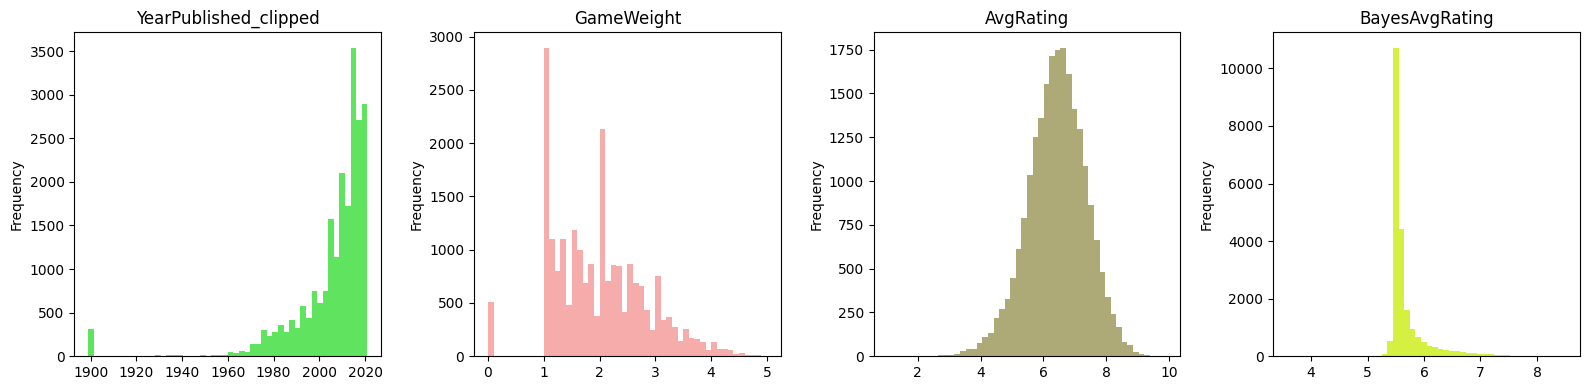

In [8]:
df_games['YearPublished_clipped'] = np.clip(df_games['YearPublished'], 1899, 2025)

selected_columns = ['YearPublished_clipped', 'GameWeight', 'AvgRating', 'BayesAvgRating']
hist_selected_columns(selected_columns)

### 1.1.2 'StdDev', 'MinPlayers', 'MaxPlayers', 'ComAgeRec'

**StdDev**			Standard deviation of Bayes Avg

**MinPlayers**		Minimum number of players

**MaxPlayers**		Maximun number of players

**ComAgeRec**		Community's recommended age minimum

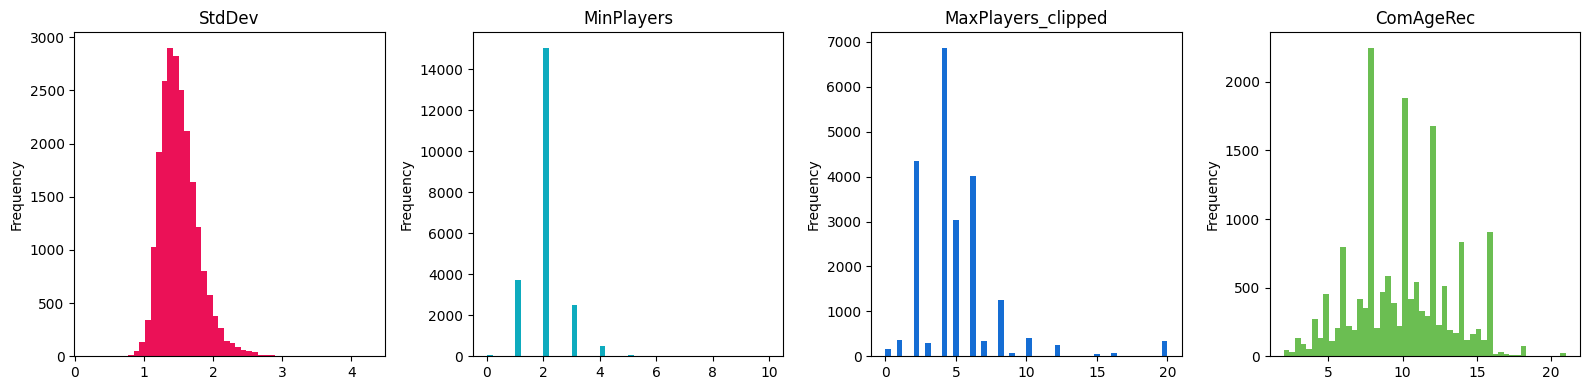

In [9]:
df_games['MaxPlayers_clipped'] = np.clip(df_games['MaxPlayers'], 0, 20)

selected_columns = ['StdDev', 'MinPlayers', 'MaxPlayers_clipped', 'ComAgeRec']
hist_selected_columns(selected_columns)

### 1.1.3 'LanguageEase', 'BestPlayers', 'NumOwned', 'NumWant'

**LanguageEase**		Language requirement

**BestPlayers**		Community voted best player count

**NumOwned**		Number of users who own this game

**NumWant**			Number of users who want this game

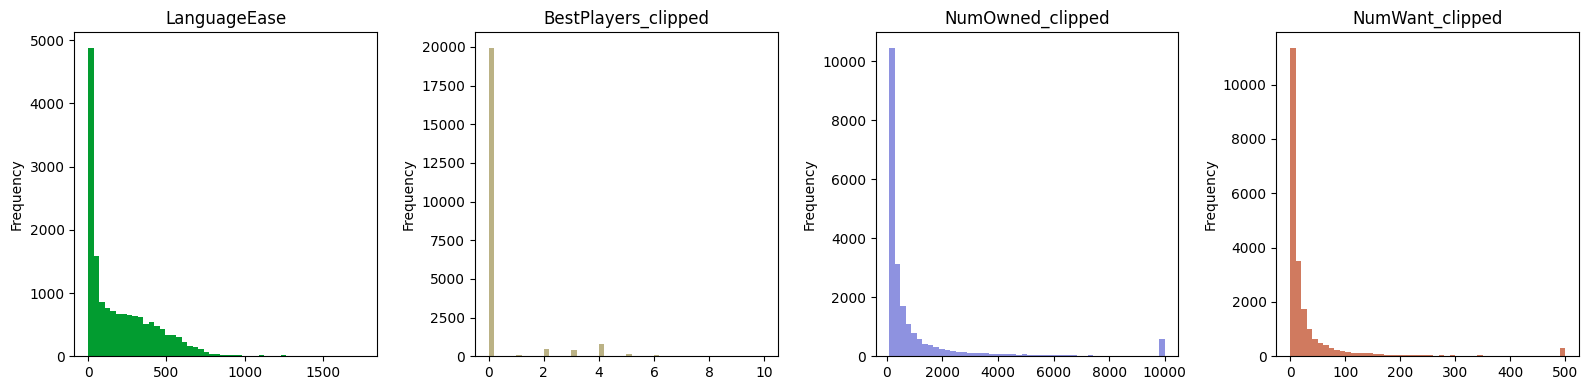

In [10]:
df_games['BestPlayers_clipped'] = np.clip(df_games['BestPlayers'], 0, 10)
df_games['NumOwned_clipped'] = np.clip(df_games['NumOwned'], 100, 10000)
df_games['NumWant_clipped'] = np.clip(df_games['NumWant'], 0, 500)
selected_columns = ['LanguageEase', 'BestPlayers_clipped', 'NumOwned_clipped', 'NumWant_clipped']
hist_selected_columns(selected_columns)

### 1.1.4 'NumWish', 'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime'

**NumWish**			Number of users who wishlisted this game

**NumWeightVotes**		? Unknown

**MfgPlayTime**		Manufacturer Stated Play Time

**ComMinPlaytime**		Community minimum play time

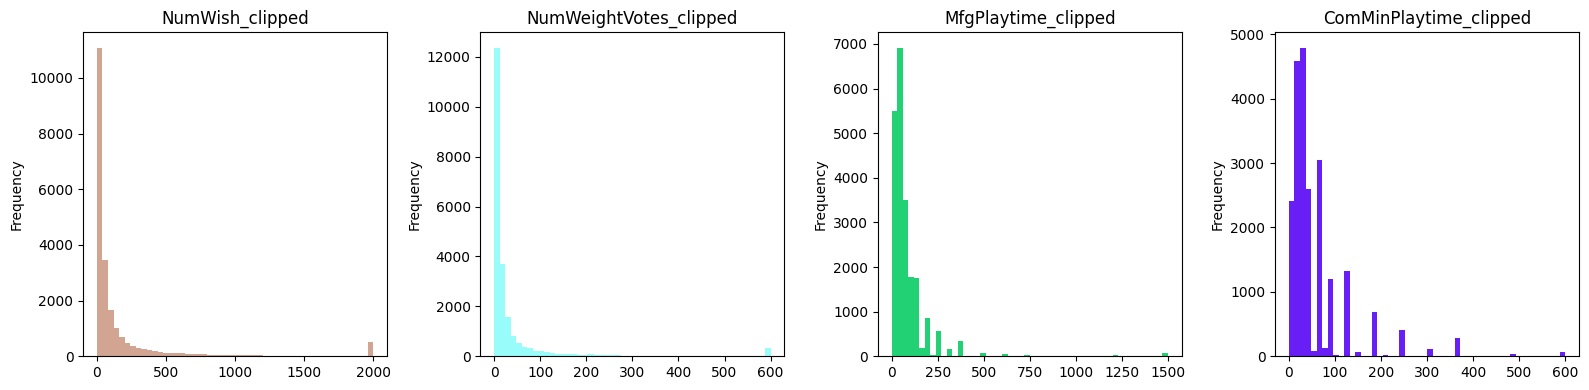

In [11]:
df_games['NumWish_clipped'] = np.clip(df_games['NumWish'], 0, 2000)
df_games['NumWeightVotes_clipped'] = np.clip(df_games['NumWeightVotes'], 0, 600)
df_games['MfgPlaytime_clipped'] = np.clip(df_games['MfgPlaytime'], 0, 1500)
df_games['ComMinPlaytime_clipped'] = np.clip(df_games['ComMinPlaytime'], 0, 600)

selected_columns = ['NumWish_clipped', 'NumWeightVotes_clipped', 'MfgPlaytime_clipped', 'ComMinPlaytime_clipped']
hist_selected_columns(selected_columns)

### 1.1.5 'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings', 'NumComments'

**ComMaxPlaytime**		Community maximum play time

**MfgAgeRec**		Manufacturer Age Recommendation

**NumUserRatings**		Number of user ratings

**NumComments**		Number of user comments

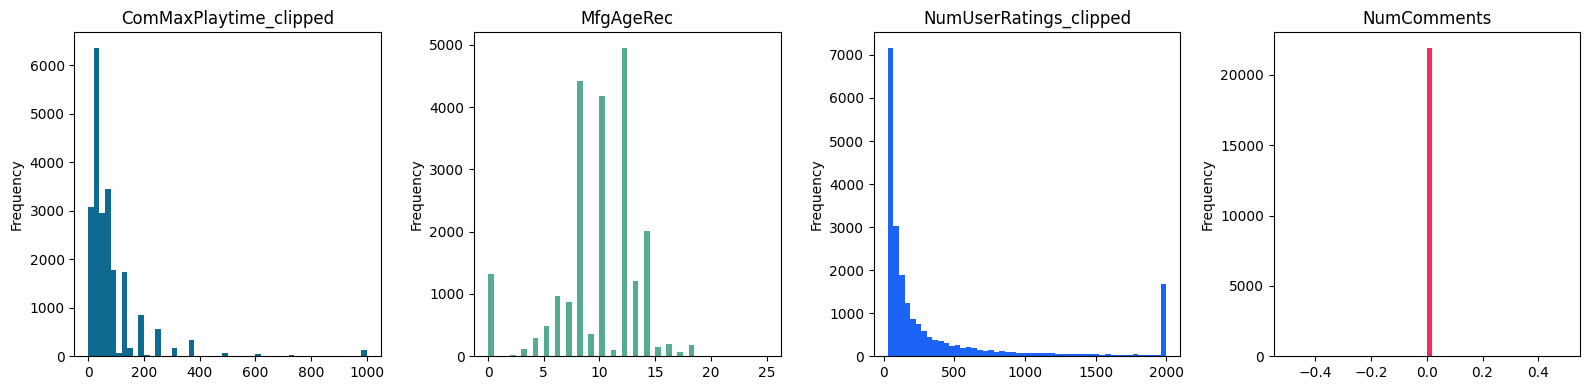

In [12]:
df_games['ComMaxPlaytime_clipped'] = np.clip(df_games['ComMaxPlaytime'], 0, 1000)
df_games['NumUserRatings_clipped'] = np.clip(df_games['NumUserRatings'], 0, 2000)

selected_columns = ['ComMaxPlaytime_clipped', 'MfgAgeRec', 'NumUserRatings_clipped', 'NumComments']
hist_selected_columns(selected_columns)

### 1.1.6 'NumAlternates', 'NumExpansions', 'NumImplementations', 'IsReimplementation'

**NumAlternates**		Number of alternate versions

**NumExpansions**		Number of expansions

**NumImplementations**	Number of implementations

**IsReimplementation**	Binary - Is this listing a reimplementation?


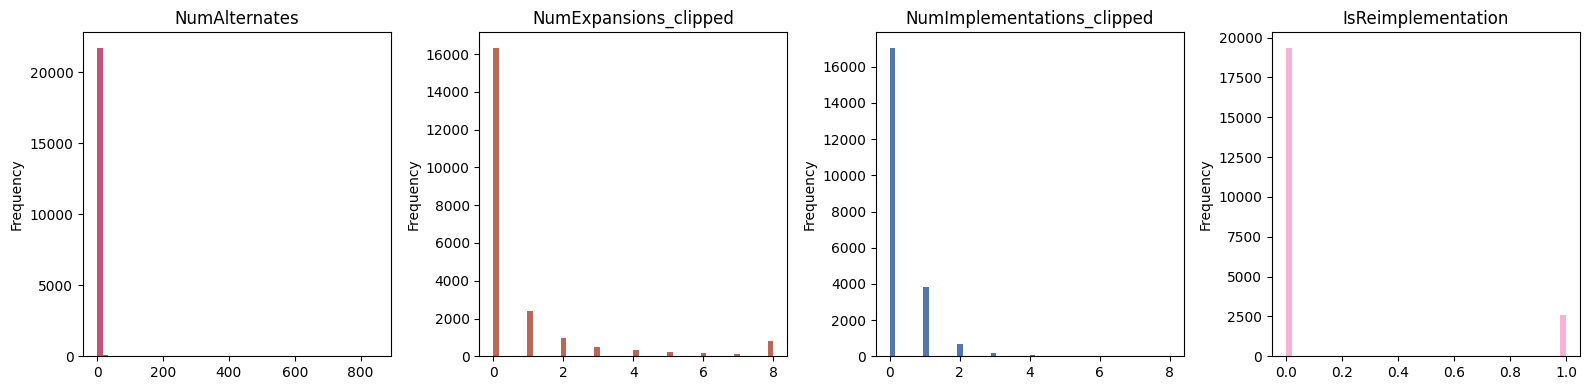

In [13]:
df_games['NumImplementations_clipped'] = np.clip(df_games['NumImplementations'], 0, 8)
df_games['NumExpansions_clipped'] = np.clip(df_games['NumExpansions'], 0, 8)

selected_columns = ['NumAlternates', 'NumExpansions_clipped', 'NumImplementations_clipped', 'IsReimplementation']
hist_selected_columns(selected_columns)

### 1.1.7 'Kickstarted','Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts'

**Kickstarted**		Binary - Is this a kickstarter?

**Rank:boardgame**		Rank for boardgames overall

**Rank:strategygames**	Rank in strategy games

**Rank:abstracts**		Rank in abstracts

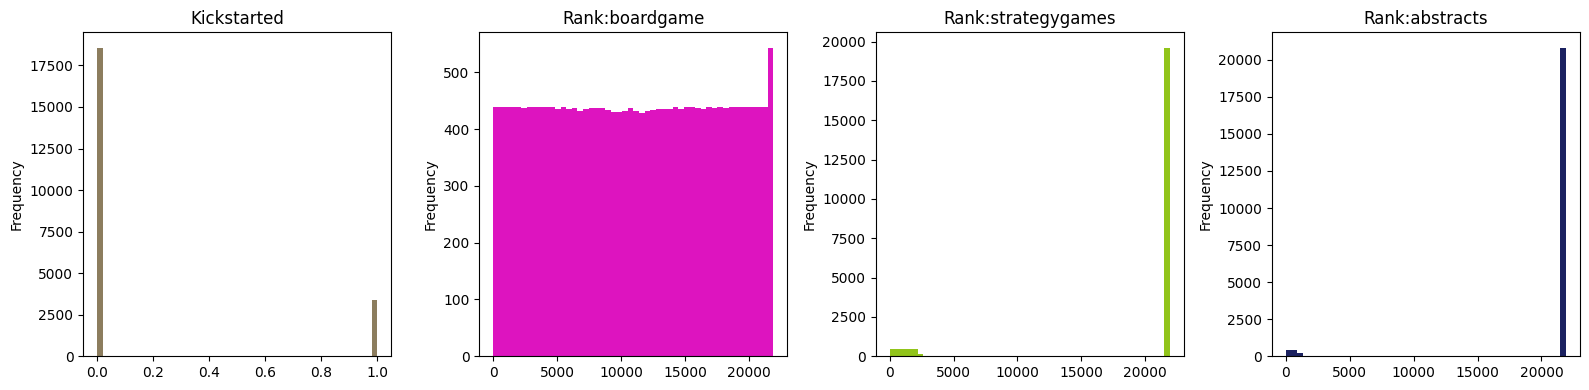

In [14]:
selected_columns = ['Kickstarted', 'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts']
hist_selected_columns(selected_columns)

### 1.1.8 'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames'

**Rank:familygames**	Rank in family games

**Rank:thematic**		Rank in thematic

**Rank:cgs**		Rank in card games

**Rank:wargames**		Rank in war games

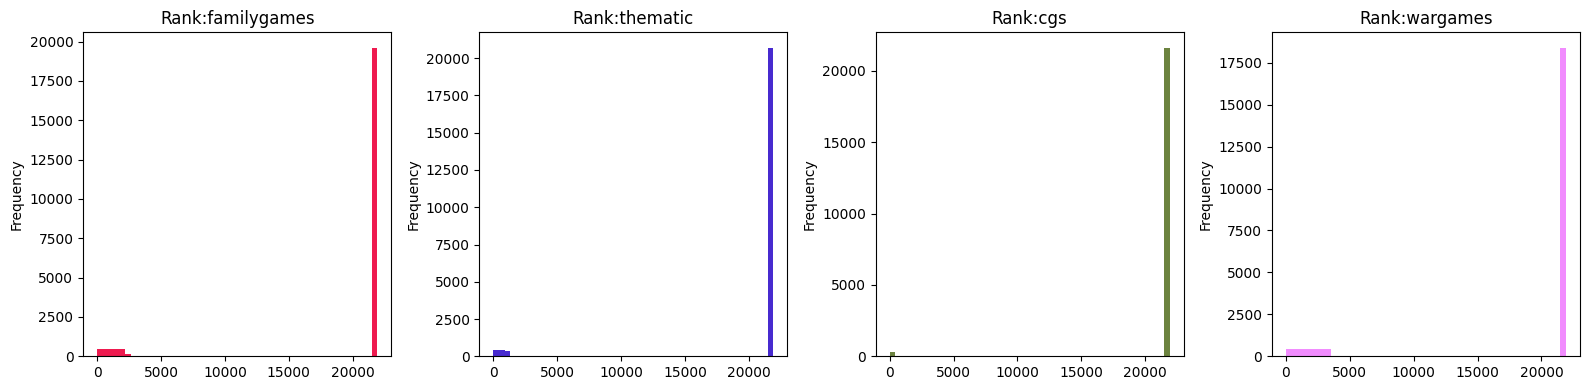

In [15]:
selected_columns = ['Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames']
hist_selected_columns(selected_columns)

### 1.1.9 'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic', 'Cat:Strategy'

**Rank:partygames**		Rank in party games

**Rank:childrensgames**	Rank in children's games

**Cat:Thematic**		Binary is in Thematic category

**Cat:Strategy**		Binary is in Strategy category

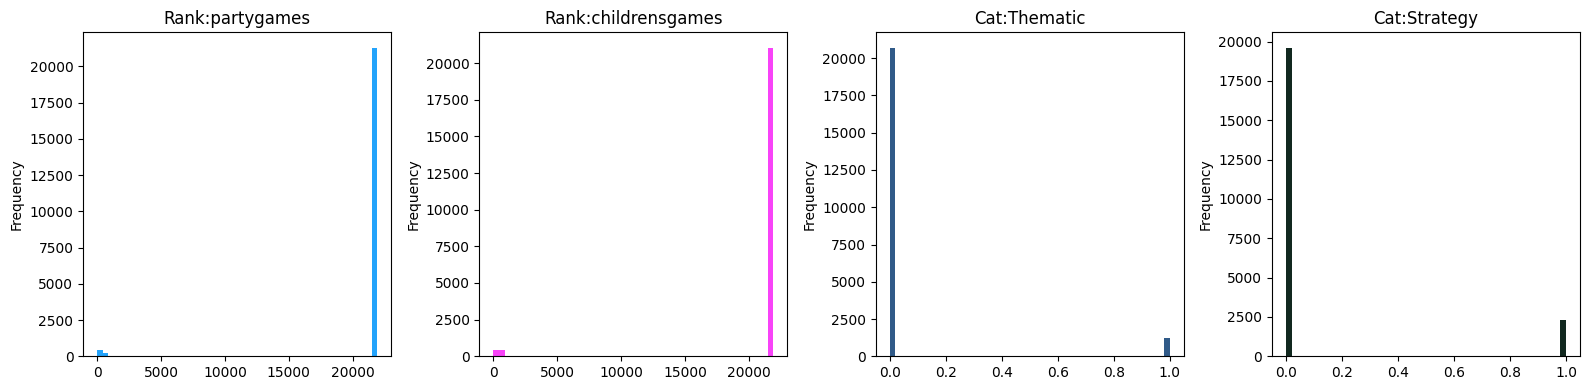

In [16]:
selected_columns = ['Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic', 'Cat:Strategy']
hist_selected_columns(selected_columns)

### 1.1.10  'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract'

**Cat:War**			Binary is in War category

**Cat:Family**		Binary is in Family category

**Cat:CGS**			Binary is in Card Games category

**Cat:Abstract**    Binary is in Abstract category

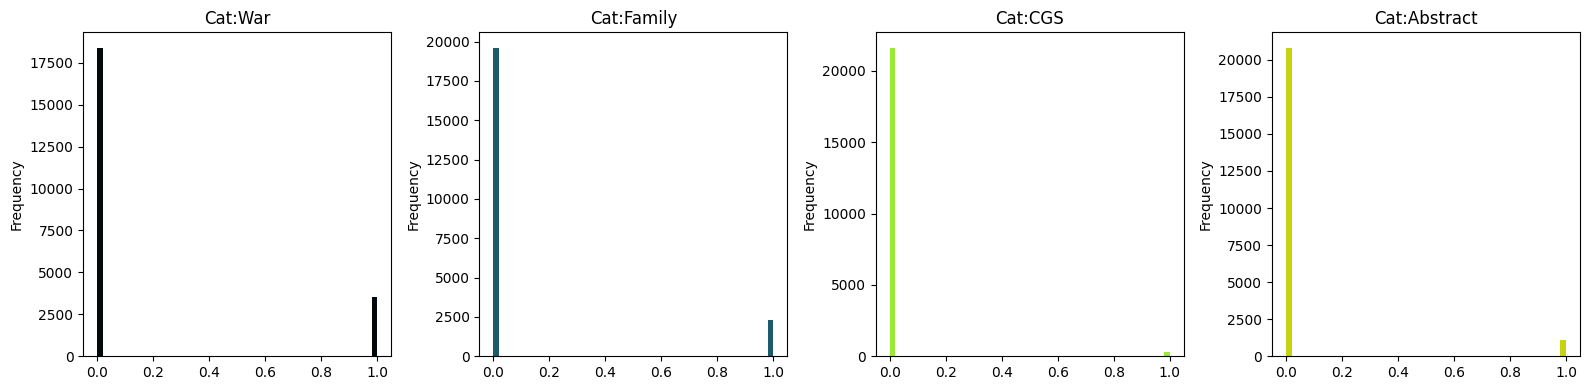

In [17]:
selected_columns = ['Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract']
hist_selected_columns(selected_columns)

### 1.1.11 'Cat:Party', 'Cat:Childrens'

**Cat:Party**		Binary is in Party category

**Cat:Childrens**		Binary is in Childrens category

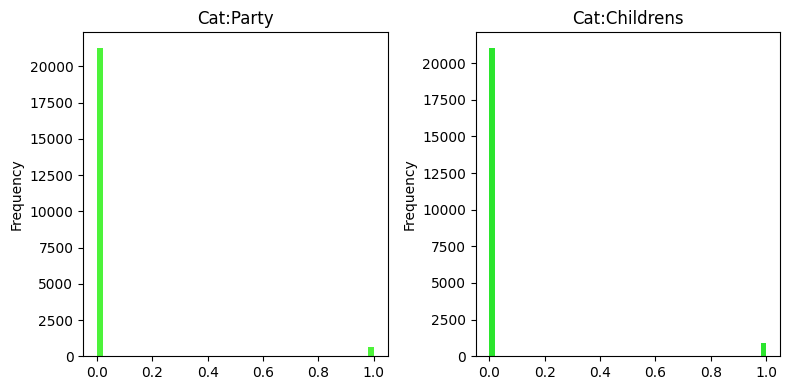

In [18]:
selected_columns = ['Cat:Party', 'Cat:Childrens']
hist_selected_columns(selected_columns)


## 1.2 Revision columnas categoricas o de ranking

In [23]:
def resumen_columnas(df):
    resumen = []
    for col in df.columns:
        serie = df[col].dropna()
        tipos_numericos = pd.api.types.is_numeric_dtype(serie)

        if not serie.empty:
            moda = serie.mode()
            if not moda.empty:
                valor_moda = moda.iloc[0]
                frecuencia_moda = (serie == valor_moda).sum()
                moda_str = f"{valor_moda} ({frecuencia_moda})"
            else:
                moda_str = None
        else:
            moda_str = None

        resumen.append({
            'columna': col,
            'valores_diferentes': serie.nunique(),
            'minimo': serie.min() if tipos_numericos else None,
            'moda': moda_str,
            'media': serie.mean() if tipos_numericos else None,
            'mediana': serie.median() if tipos_numericos else None,
            'maximo': serie.max() if tipos_numericos else None
        })

    return pd.DataFrame(resumen)


In [24]:
rank_cols = df_games.filter(like='Rank:').columns.tolist()
resumen_columnas(df_games[rank_cols])

,columna,valores_diferentes,minimo,moda,media,mediana,maximo
0,Rank:boardgame,21579,1,21926 (347),11019.514071,11022.0,21926
1,Rank:strategygames,2320,1,21926 (19606),19729.826956,21926.0,21926
2,Rank:abstracts,1116,1,21926 (20810),20839.347184,21926.0,21926
3,Rank:familygames,2317,1,21926 (19609),19732.270011,21926.0,21926
4,Rank:thematic,1225,1,21926 (20701),20736.185815,21926.0,21926
5,Rank:cgs,304,1,21926 (21622),21625.086796,21926.0,21926
6,Rank:wargames,3531,1,21926 (18395),18680.185678,21926.0,21926
7,Rank:partygames,641,1,21926 (21285),21295.352201,21926.0,21926
8,Rank:childrensgames,882,1,21926 (21044),21062.680274,21926.0,21926


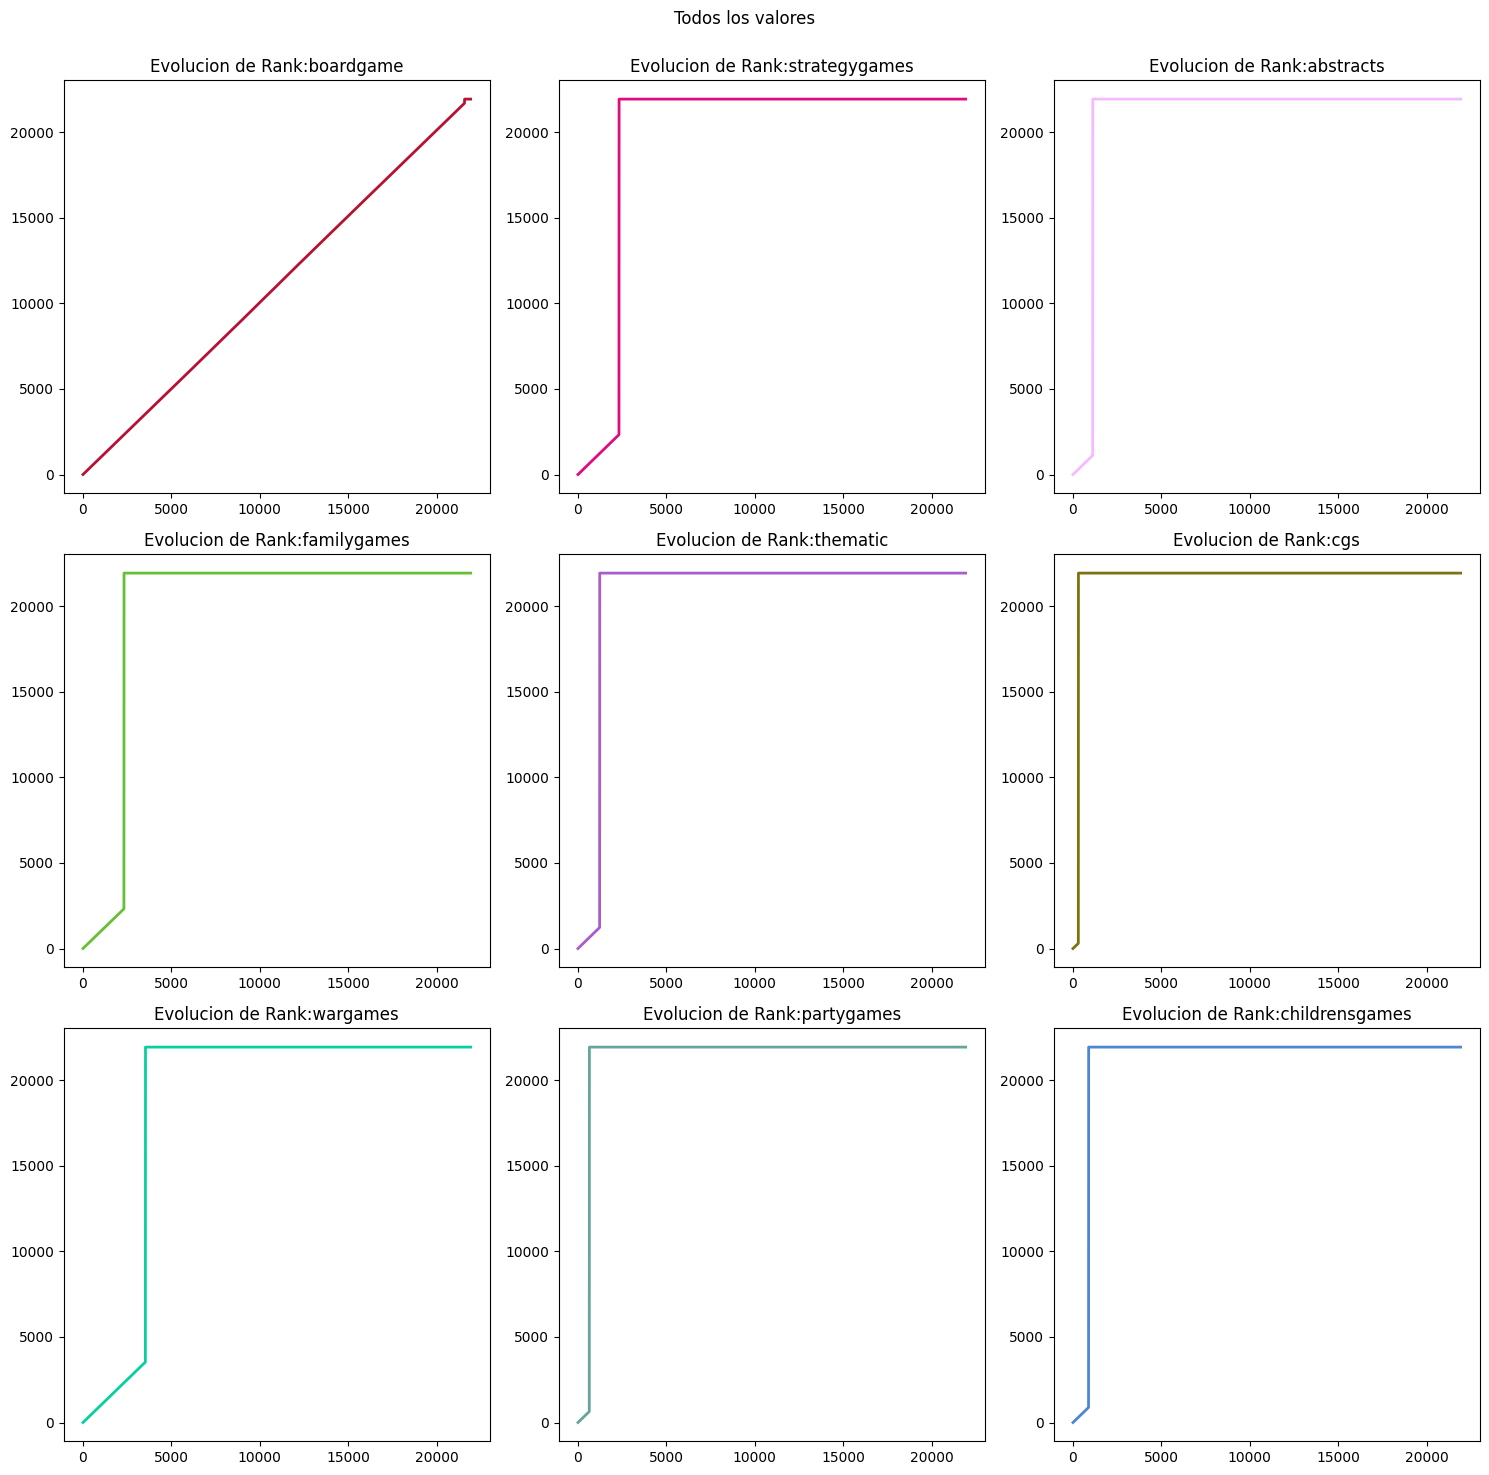

In [30]:
fig, _ax = plt.subplots(3, 3, figsize=(15, 15))
_ax = _ax.ravel()

for ax, col in zip(_ax, rank_cols):
    serie = df_games[col].dropna().sort_values().reset_index(drop=True)
    ax.plot(serie.index, serie, label=col, linewidth=2, color=np.random.rand(3))
    ax.set_title(f'Evolucion de {col}')

plt.suptitle('Todos los valores')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


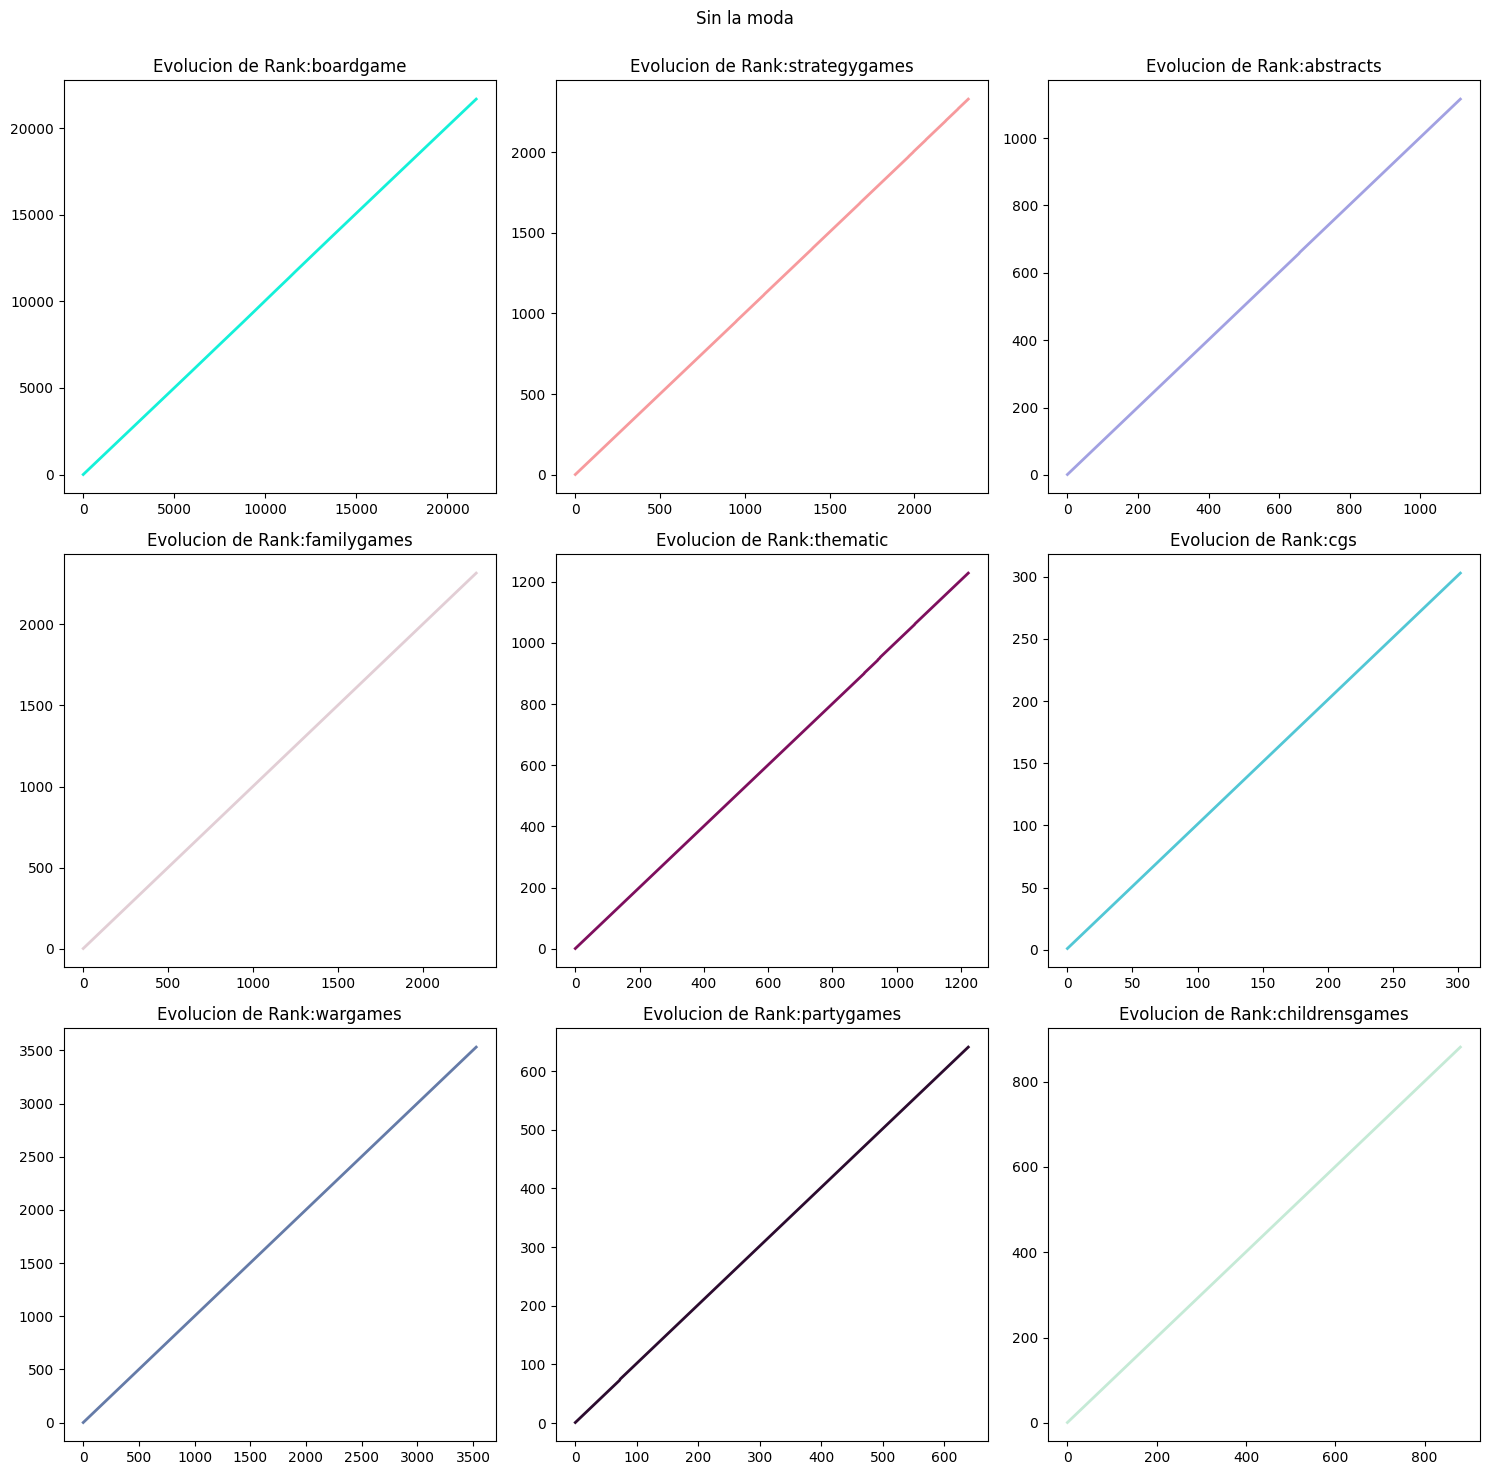

In [31]:
fig, _ax = plt.subplots(3, 3, figsize=(15, 15))
_ax = _ax.ravel()

for ax, col in zip(_ax, rank_cols):
    serie = df_games[col].dropna().sort_values().reset_index(drop=True)
    serie = serie[serie!=21926]
    ax.plot(serie.index, serie, label=col, linewidth=2, color=np.random.rand(3))
    ax.set_title(f'Evolucion de {col}')

plt.suptitle('Sin la moda')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


In [34]:
cat_cols = df_games.filter(like='Cat:').columns.tolist()
df_games[cat_cols].isnull().sum()

Cat:Thematic     0
Cat:Strategy     0
Cat:War          0
Cat:Family       0
Cat:CGS          0
Cat:Abstract     0
Cat:Party        0
Cat:Childrens    0
dtype: int64

In [42]:
df_games[cat_cols].sum(axis=1).value_counts()

0    11184
1     9167
2     1561
3       13
Name: count, dtype: int64

(0.0, 12917.0)

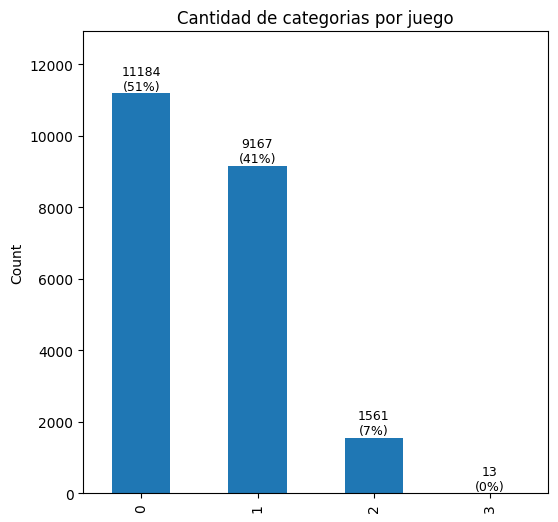

In [39]:
fig, ax = plt.subplots(figsize=(6, 6))
(aux := df_games[cat_cols].sum(axis=1).value_counts()).plot.bar(ax=ax, title='Cantidad de categorias por juego')
total = aux.values.sum()
for i, value in enumerate(aux.values):
    ax.text(i, value + 0.5, f"{value}\n({int(100 * value / total)}%)", ha="center", va="bottom", fontsize=9)
ax.set_ylabel("Count")
ax.set_ylim(0, int(ax.get_ylim()[1] * 1.1))


## 1. Conclusiones

In [44]:
for cc in cat_cols:
    print(df_games[cc].value_counts())

Cat:Thematic
0    20701
1     1224
Name: count, dtype: int64
Cat:Strategy
0    19606
1     2319
Name: count, dtype: int64
Cat:War
0    18395
1     3530
Name: count, dtype: int64
Cat:Family
0    19609
1     2316
Name: count, dtype: int64
Cat:CGS
0    21622
1      303
Name: count, dtype: int64
Cat:Abstract
0    20810
1     1115
Name: count, dtype: int64
Cat:Party
0    21285
1      640
Name: count, dtype: int64
Cat:Childrens
0    21044
1      881
Name: count, dtype: int64
